## Analyse textuelle du débat sur l'Article 9

In [2]:
#coding: utf-8
#importing modules
#lecture des json
import json
#text-minig
import re
#viz
import matplotlib
import matplotlib.pyplot as plt
#calcul
import numpy as np
from itertools import combinations
%matplotlib inline

## Article 9: version originale

In [3]:
def load_vo(art_file = "./article_9.json"):
    with open(art_file, "r") as f:
        article9 = json.load(f)
    return article9
article9 = load_vo()


* **découvrir les informations disponibles dans l'article9**

In [4]:
# toutes les clés du dictionnaire de l'article9
print("Clés de l'ARTICLE 9:")
for clé, valeur in list(article9.items()):
    print("-"+clé, type(valeur))

Clés de l'ARTICLE 9:
-cat_id <class 'int'>
-votes_ok <class 'int'>
-votes_nok <class 'int'>
-versions <class 'list'>
-body_links <class 'list'>
-ranking <class 'NoneType'>
-body <class 'str'>
-sources <class 'list'>
-author <class 'str'>
-updated_at <class 'str'>
-article_id <class 'int'>
-body_anchors <class 'list'>
-answer <class 'dict'>
-versions_count <class 'int'>
-arguments <class 'list'>
-created_at <class 'str'>
-sources_count <class 'int'>
-article_link <class 'str'>
-arguments_count <class 'int'>
-votes_mitige <class 'int'>
-title <class 'str'>
-subtitle <class 'str'>
-votes_total <class 'int'>


L'article9 stocke à la fois les informations contextuelles sur l'article dans sa version originale mais encore
tous les **arguments**, les **sources** et toutes les **versions** de cet article.
On note que les **votes** sont pour le moment dans un fichier à part.
Nous allons garder de coté les arguments, sources et versions pour les manipuler 

In [5]:
#on stocke les informations dans des variables simples
versions = article9["versions"] #toutes les versions sans la version originale
arguments = article9["arguments"] #tous les arguments (version orginale+ versions complémentaires??? a verifier)
sources = article9["sources"] #toutes les sources


### Versions de l'article 9

Ici nous allons nous concentrer sur les différentes versions (amendements) de l'article 
ainsi que les **commentaires** qui justifient ces modifications


* **découvrir les informations contenues dans les versions**:

*pour l'exemple nous allons prendre le premier amendement de l'article 9 (soit V1)*


In [6]:
v1 = versions[0]
print("Les informations pour une version")
for clé, valeur in v1.items():
    print("-"+clé, type(valeur))

Les informations pour une version
-arguments_no_count <class 'int'>
-arguments_yes_count <class 'int'>
-votes_nok <class 'int'>
-created_at <class 'str'>
-comment <class 'str'>
-slug <class 'str'>
-link <class 'str'>
-id <class 'int'>
-updated_at <class 'str'>
-arguments_count <class 'int'>
-author <class 'str'>
-article_id <class 'int'>
-title <class 'str'>
-before <class 'str'>
-after <class 'str'>
-votes_total <class 'int'>
-votes_mitige <class 'int'>


Les valeurs qui vont nous intéresser dans un premier temps vont etre:
* le titre
* le comment

* ** combien d'amendements? **


In [7]:
print(len(versions), "amendements + 1 version originale")  

108 versions complémentaires + 1 version originale


### Formater la version originale
Nous allons dans un premier temps formatter la version originale de la même manière que les versions complémentaire.
avec les mêmes informations disponibles dans chaque version
La version originale avec les informations qui nous intéressent sous forme de dictionnaire (de la même manière que les autres versions)

En sachant que :
* la version originale n'a pas de comment mais une explication de l'article (body) ainsi qu'une réponse aux multiples arguments (answer)
* le titre complet n'est pas stocké dans l'article on se servira dans un premier temps du subtitle
* les votes mitigés ne sont pas comptabilisés
* la repartition des arguments entre ok et pas ok n'est pas disponible (il faudrait mapper chaque argument de cette version pour en avoir le coeur net (plus tard)



In [8]:
v0 = {"link": article9["article_link"], 
      "title": article9["subtitle"], 
      "after": article9["body"], 
      "comment": article9["answer"], 
      "votes_ok": article9["votes_ok"],
      "votes_nok": article9["votes_nok"],
      "votes_mitige": article9["votes_total"] - (article9["votes_ok"]+article9["votes_nok"]),
      "votes_total": article9["votes_total"], 
      "created_at": article9["created_at"],
      "udpated_at": article9["updated_at"],
      "author": "gouvernement",
      "id": article9["article_id"],
      "arguments_count": article9["arguments_count"],
      #manque 
      #arguments_yes_count
      #arguments_no_count
     }

### Rapatrier la version originale dans les versions

Nous allons donc rappatrier **v0** (notre version originale) dans notre variable **versions** qui est une *liste*.
La variable version est une liste ordonnée qui respecte l'ordre chronologique des version:
nous allons donc insérer en position 0

In [9]:
versions.insert(0, v0)


In [10]:
print(versions[0])

{'udpated_at': '2015-09-26T07:31:38+0200', 'votes_ok': 1320, 'id': 69, 'created_at': '2015-09-26T02:27:57+0200', 'comment': {}, 'author': 'gouvernement', 'link': 'http://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-2-travaux-de-recherche-et-de-statistique/article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics', 'votes_total': 3334, 'votes_mitige': 282, 'votes_nok': 1732, 'title': 'Travaux de recherche et de statistique', 'arguments_count': 132, 'after': 'Au chapitre 3 du titre 3 du livre V du code de la recherche, il est inséré un article L. 533-4 ainsi rédigé\xa0:«Art. L. 533-4 –I. Lorsque un écrit scientifique, issu d’une activité de recherche financée au moins pour moitié par des fonds publics, est publié dans un périodique, un ouvrage paraissant au moins une fois par an, des actes de congrès ou de colloques ou des recueils de mélanges, son auteur, même en cas de cession exclusive à un éditeur, dispose du

In [11]:
print(versions[1])

{'arguments_no_count': 5, 'arguments_yes_count': 4, 'votes_nok': 29, 'created_at': '2015-09-26T23:16:53+0200', 'comment': 'Cette modification vise à rendre systématique la mise à disposition des publications relatives à des travaux de recherche financées par des fonds publics. Si l\'article L533-4 se contente d\'une formule incitative\xa0en permettant simplement aux auteurs de mettre à disposition leurs publications, une grande partie ne le fera pas, comme c\'est actuellement le cas dans de nombreux établissements français qui mettent pourtant en place des politiques d\'incitation au dépôt dans le système HAL, par exemple.\nIl serait bien entendu nécessaire, si un tel mandat de dépôt était instauré au niveau national, que l\'interface utilisée pour mettre les publications à disposition soit facile et rapide d\'utilisation pour les chercheurs. Des moyens spécifiques devraient donc être alloués à ces développements informatiques, et à la maintenance de ces développements.\xa0Ces moyens p

* ** Combien de versions?**:

In [12]:
print(len(versions),"versions")

109 versions


* **Combien de votes et d'arguments par version?**

In [13]:
print ("version_nb\t|votes nb\t|arguments nb\t|auteur")
print("---------------------------------------------------------------------")
for i,v in enumerate(versions):
    print ("version_"+str(i)+"\t|", v["votes_total"], "\t\t|", v["arguments_count"], "\t\t|", v["author"])

version_nb	|votes nb	|arguments nb	|auteur
---------------------------------------------------------------------
version_0	| 3334 		| 132 		| gouvernement
version_1	| 66 		| 9 		| philippegambette
version_2	| 0 		| 0 		| melaniedulongderosnay
version_3	| 3 		| 1 		| alainbensoussan
version_4	| 1 		| 0 		| melaniedulongderosnay
version_5	| 1 		| 0 		| lefebvrenarefrederic
version_6	| 0 		| 0 		| tanataricoalessandra
version_7	| 0 		| 0 		| watine
version_8	| 6 		| 0 		| adbsassociationdesprofessionnelsdelinformationetdeladocumentation1
version_9	| 0 		| 0 		| sbauin
version_10	| 2 		| 0 		| nicolaslarchet
version_11	| 78 		| 2 		| epristassociationdesresponsablesistdesorganismesderecherchefrancais
version_12	| 3 		| 2 		| jeannevarasco
version_13	| 7 		| 0 		| julianbh
version_14	| 17 		| 0 		| durandaline
version_15	| 4 		| 2 		| dominiquelecomte
version_16	| 11 		| 2 		| alainlecavelier
version_17	| 8 		| 1 		| hervemorel
version_18	| 71 		| 3 		| federationnationaledelapressedinforma

Ecrivons ces données dans un fichier pour plus tard (on ne sait jamais)
ici une version minimale:

In [14]:

with open("liste_des_versions.csv", "w") as f:
    f.write("version_nb\tvotes nb\targuments nb\tauteur\n")
    for i,v in enumerate(versions):
        f.write("version_"+str(i)+"\t"+str(v["votes_total"])+"\t"+str(v["arguments_count"])+"\t"+v["author"]+"\n")
#NB: vu qu'on manipule des listes on pourrait l'écrire grace à la fonction join() qui va avec les listes
#Si on voulait faire de la visualisation le Notebook 
#Cartographie%20des%20comportements%20des%20electeurs.ipynb


#### Les commentaires des versions
L'objectif ici est de faire un état des lieux des mots employés pour justifier les modifications apportés à la version originale 
dans une version complémentaire:

Dans un premier temps, il s'agit de vérifier l'état des modifications:
* Y-a-t-il eu beaucoup de modification du texte original? 
* Combien de mots d'une version à l'autre ?
* Combien de mots au total de la version initiale à la version finale?

Dans un deuxième temps, il s'agira de plonger dans le détail des *commentaires justificatifs* 
et regarder les mots communs et différents à chaque versions
* Combien de mots en commun de version a version+1
* Combien de mots différents de version a version+1
* Quels sont les mots les plus utilisés?


Dans un troisième temps, il faudra plonger dans le détail des auteurs
en effet un auteur a parfois fait plusieurs modifications.
* Combien d'auteur unique?
* Combien de versions par auteurs?
* Chaque auteur a-t-il un vocabulaire particulier? 
* Analyser la proximité/distance lexicale des auteurs entre eux (mots communs/mots différents)



Dans un quatrième temps, il faudra rappatrier tous les electeurs qui ont voté pour la modification de versions
* Quels sont les auteur les plus populaires en nombre de votes absolus?
* Quels sont les auteurs les plus proches (en regardant les electeurs qui ont voté pour la même personne)



### Etat des modifications de l'article par versions

Nous allons donc dans un premier temps vérifier les modifications du texte original.
Nous avons besoin d'une fonction qui transforme un texte en une liste de mots une opération qu'on appelle **chunking**
i.e découper le texte en petit bout. Ici on va découper les mots simplement en utilisant le caractère distinctif de l'espace ou de la ponctuation.
Un mot est donc ici défini comme une suite de lettres ou de chiffres séparés par un espace, ou un point de ponctuation.
Créons notre fonction **get_words** 
qui nous servira à multiples reprises: elle prend en entrée un texte (n'importe lequel l'avantage de créer une fonction) et renvoie une liste de mots


In [15]:
def get_words(text):
    #on se sert du module regex trèèèèèès puissant
    #avec une notation propre W
    #tout ce qui est un espace et tout ce qui n'est pas une lettre
    words = re.split('\W', text)
    #print(words)
    return words
    

In [16]:
#test
get_words("La vie n'est pas un long fleuve tranquille")

['La', 'vie', 'n', 'est', 'pas', 'un', 'long', 'fleuve', 'tranquille']

* **Transformons la version 0 et la version 109 en liste de mots**

Le texte dans sa version transformé est stocké dans ```'after'```

In [17]:
#print (versions[0]["after"])
#la premiere
motsv0 = get_words(versions[0]["after"])
print(motsv0)
#la derniere
motsv109 = get_words(versions[-1]["after"])
print(motsv109)

['Au', 'chapitre', '3', 'du', 'titre', '3', 'du', 'livre', 'V', 'du', 'code', 'de', 'la', 'recherche', '', 'il', 'est', 'inséré', 'un', 'article', 'L', '', '533', '4', 'ainsi', 'rédigé', '', '', 'Art', '', 'L', '', '533', '4', '', 'I', '', 'Lorsque', 'un', 'écrit', 'scientifique', '', 'issu', 'd', 'une', 'activité', 'de', 'recherche', 'financée', 'au', 'moins', 'pour', 'moitié', 'par', 'des', 'fonds', 'publics', '', 'est', 'publié', 'dans', 'un', 'périodique', '', 'un', 'ouvrage', 'paraissant', 'au', 'moins', 'une', 'fois', 'par', 'an', '', 'des', 'actes', 'de', 'congrès', 'ou', 'de', 'colloques', 'ou', 'des', 'recueils', 'de', 'mélanges', '', 'son', 'auteur', '', 'même', 'en', 'cas', 'de', 'cession', 'exclusive', 'à', 'un', 'éditeur', '', 'dispose', 'du', 'droit', 'de', 'mettre', 'à', 'disposition', 'gratuitement', 'sous', 'une', 'forme', 'numérique', '', 'sous', 'réserve', 'des', 'droits', 'des', 'éventuels', 'coauteurs', '', 'la', 'dernière', 'version', 'acceptée', 'de', 'son', 'man

On remarque ici qu'il y a des élements vides dans la liste. 
On va donc affiner notre fonction préalable en filtrant les élements vides:

In [18]:
def get_words(text):
    #on se sert du module regex trèèèèèès puissant
    #avec une notation propre W
    #tout ce qui est un espace et tout ce qui n'est pas une lettre
    words = re.split('\W', text)
    #print(words)
    return [w for w in words if w != ""]

In [19]:
motsv0 = get_words(versions[0]["after"])
print(motsv0)
#la derniere on commence à 0 donc c'est la version 1O8 ;)
motsv108 = get_words(versions[-1]["after"])
print(motsv108)

['Au', 'chapitre', '3', 'du', 'titre', '3', 'du', 'livre', 'V', 'du', 'code', 'de', 'la', 'recherche', 'il', 'est', 'inséré', 'un', 'article', 'L', '533', '4', 'ainsi', 'rédigé', 'Art', 'L', '533', '4', 'I', 'Lorsque', 'un', 'écrit', 'scientifique', 'issu', 'd', 'une', 'activité', 'de', 'recherche', 'financée', 'au', 'moins', 'pour', 'moitié', 'par', 'des', 'fonds', 'publics', 'est', 'publié', 'dans', 'un', 'périodique', 'un', 'ouvrage', 'paraissant', 'au', 'moins', 'une', 'fois', 'par', 'an', 'des', 'actes', 'de', 'congrès', 'ou', 'de', 'colloques', 'ou', 'des', 'recueils', 'de', 'mélanges', 'son', 'auteur', 'même', 'en', 'cas', 'de', 'cession', 'exclusive', 'à', 'un', 'éditeur', 'dispose', 'du', 'droit', 'de', 'mettre', 'à', 'disposition', 'gratuitement', 'sous', 'une', 'forme', 'numérique', 'sous', 'réserve', 'des', 'droits', 'des', 'éventuels', 'coauteurs', 'la', 'dernière', 'version', 'acceptée', 'de', 'son', 'manuscrit', 'par', 'son', 'éditeur', 'et', 'à', 'l', 'exclusion', 'du',

* **Combien de mots?**

In [20]:


print("La version 0 compte", len(motsv0), "mots")
print("La version 108 compte", len(motsv108), "mots")
print(len(motsv108) - len(motsv0))


La version 0 compte 206 mots
La version 108 compte 178 mots
-28


Il y a donc des mots qui ont été enlevés plus qu'ajoutés entre les deux versions:
quels sont_il?

In [21]:
diff = set(motsv0) - set(motsv109)
symetric_diff = set(motsv0) ^ set(motsv109)
print(list(diff))
print(list(symetric_diff))


['Au', 'droit', 'inséré', 'chapitre', '4', '533', 'coauteurs', 'il', 'livre', 'rédigé', 'Art', 'L', 'titre', 'V', 'ainsi', '3', 'code']
['', 'Art', 'dudroit', 'coauteurs', 'code', 'droit', 'co', 'titre', '4', 'livre', 'chapitre', 'L', 'ainsi', 'Au', 'auteurs', 'inséré', '533', 'il', 'rédigé', 'V', '3']


On remarque ici que les seuls mots retirés de la version sont des mots liés au contexte dans lequel s'ajoute la loi.
On vérifie cette assertion en regarder la variation des mots versions par version

In [22]:
#on fait une liste avec tout les mots de la même manière que précédemment
mots_v = [get_words(v["after"]) for v in versions]
#et on compare v a v+1
diff_v = [[list(set(mots_v[i+1])- set(mots_v[i])), list(set(mots_v[i]) - set(mots_v[i+1]))] for i in range(len(mots_v)-1)]
#symetric_diff_v = [set(mots_v[i+1]) ^ set(mots_v[i]) for i in range(len(mots_v)-1)]
for i, diff in enumerate(diff_v):
    ajout, supp = diff
    print("version", i+1,"a ajouté", ajout,"et retiré", supp)
    
    
    

version 1 a ajouté ['auteurs', 'co', 'dudroit'] et retiré ['Au', 'droit', 'inséré', 'chapitre', '4', '533', 'coauteurs', 'il', 'livre', 'rédigé', 'Art', 'L', 'titre', 'V', 'ainsi', '3', 'code']
version 2 a ajouté [] et retiré []
version 3 a ajouté [] et retiré []
version 4 a ajouté [] et retiré []
version 5 a ajouté [] et retiré []
version 6 a ajouté [] et retiré []
version 7 a ajouté [] et retiré []
version 8 a ajouté [] et retiré []
version 9 a ajouté [] et retiré []
version 10 a ajouté [] et retiré []
version 11 a ajouté [] et retiré []
version 12 a ajouté [] et retiré []
version 13 a ajouté [] et retiré []
version 14 a ajouté [] et retiré []
version 15 a ajouté [] et retiré []
version 16 a ajouté [] et retiré []
version 17 a ajouté [] et retiré []
version 18 a ajouté [] et retiré []
version 19 a ajouté [] et retiré []
version 20 a ajouté [] et retiré []
version 21 a ajouté [] et retiré []
version 22 a ajouté [] et retiré []
version 23 a ajouté [] et retiré []
version 24 a ajouté []

Très peu de changement comme on peut le voir...

Ce n'est donc pas dans le texte lui même que le débat sur l'article de loi c'est joué

### Commentaires des versions
La première version n'a pas de commentaire en revanche certaines modifications ont fait l'objet de commentaires

stockées dans ```'comment'```

In [23]:
#ici on compare v0 et V108
print("Version 0", versions[0]["comment"])
print("Version 108", versions[-1]["comment"])


Version 0 {}
Version 108 La recherche financée par l'Etat appartient à tous, tous doivent pouvoir l'utiliser à des fins commerciales ou non !


On remarque que la version originale n'a pas de commentaire. Ce qui est logique!
On va se concentrer donc sur les commentaires liés à la réécriture du texte de loi comme un moyen de justifier 
les changements opérés sur le texte de loi qui eux n'ont pas été bien stockés.

In [25]:
comments_v = [get_words(str(v["comment"])) for v in versions[1:]]
print(len(comments_v),"commentaires de versions")
for i,co in enumerate(comments_v):
    print ("commentaire de v", i+1,"\t\t", len(co), "\tmots")

108 commentaires de versions
commentaire de v 1 		 174 	mots
commentaire de v 2 		 104 	mots
commentaire de v 3 		 578 	mots
commentaire de v 4 		 46 	mots
commentaire de v 5 		 27 	mots
commentaire de v 6 		 54 	mots
commentaire de v 7 		 1 	mots
commentaire de v 8 		 1 	mots
commentaire de v 9 		 1 	mots
commentaire de v 10 		 1 	mots
commentaire de v 11 		 105 	mots
commentaire de v 12 		 88 	mots
commentaire de v 13 		 23 	mots
commentaire de v 14 		 56 	mots
commentaire de v 15 		 22 	mots
commentaire de v 16 		 460 	mots
commentaire de v 17 		 172 	mots
commentaire de v 18 		 756 	mots
commentaire de v 19 		 1 	mots
commentaire de v 20 		 1 	mots
commentaire de v 21 		 164 	mots
commentaire de v 22 		 3 	mots
commentaire de v 23 		 62 	mots
commentaire de v 24 		 136 	mots
commentaire de v 25 		 34 	mots
commentaire de v 26 		 1 	mots
commentaire de v 27 		 1 	mots
commentaire de v 28 		 394 	mots
commentaire de v 29 		 34 	mots
commentaire de v 30 		 357 	mots
commentaire de v 3

In [58]:
stats_modifications = []
with open("liste_des_commentaires.csv", "w") as f:
    header = ["version_"+str(i+1), "commentaire","mots", "nb_mots", "auteur", "votes_pour", "votes_contre", "votes_neutre", "votes_total", "arguments_pour", "arguments_contre", "arguments_total"]
    f.write("\t".join(header))
    
    for i,v in enumerate(versions[1:]):
        auteur = v["author"]
        votes_total = v["votes_total"]
        #votes_pour = v["votes_ok"]
        votes_contre = v["votes_nok"]
        votes_neutre = v["votes_mitige"]
        votes_pour = votes_total-(votes_contre+votes_neutre)
        commentaire = v["comment"]
        words = get_words(str(v["comment"]))
        arguments_total = v["arguments_count"]
        arguments_pour = v["arguments_yes_count"]
        arguments_contre = v["arguments_no_count"]
        #print("version_"+str(i+1),str(len(get_words(v["comment"]))),  v["author"], str(v["votes_total"])) 
        row = ["version_"+str(i+1), commentaire, len(words), auteur, votes_pour, votes_contre, votes_neutre, votes_total, arguments_pour, arguments_contre, arguments_total]
        f.write("\t".join([str(n) for n in row]))
        stats_modifications.append(row)

ValueError: could not convert string to float: 'ne'

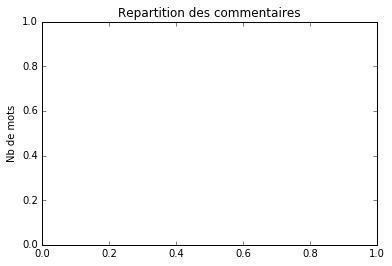

In [28]:
modifs_comments = []
#modifs_stats = []
for i in range(len(comments_v)-1):
    #ajout = list(set(comments_v[i+1])- set(comments_v[i]))
    #supp = list(set(comments_v[i]) - set(comments_v[i+1]))
    commun = list(set(comments_v[i+1]) & set(comments_v[i]))
    diff = list(set(comments_v[i+1]) ^ set(comments_v[i]))
    modif = [commun, diff]
    #modif_stats = [len(ajout), len(supp), len(commun), len(diff)]
    modifs_comments.append(modif)
    #modifs_stats.append(modif_stats)

for i, v in enumerate(modifs_comments):
    print("*comparaison de version", str(i+2),"avec", str(i+1), ":") 
    print("\t-nombre de mots communs", len(v[0]))
    print("\t-nombre de mots differents", len(v[1]))
  
    


In [ ]:
### Vérifions donc la repartition des 

def show_nb_votes_by_versions(vs):
    #for k,v in vs.items():
    #    print(len(v["votes"]),"votes sur la version:" , k )
    N = len(vs)
    votes_nb = [len(v["votes"])  for v in vs.values()]
    
    plt.title("Repartition des votes simples par version")
    plt.ylabel('Nb votes')
    #pylab.xlim([0,108])
    #pylab.xlim([0,N])
    plt.plot(votes_nb,color='r')
    #votes_declares = [v["total_votes"] for v in vs.values()]
        
    #votes_declares = [len(v["total_votes"]) for v in vs.values()]
    #plt.plot(votes_declares,color='b')
    plt.show()
    
    return
show_nb_votes_by_versions(versions)